In [14]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('passenger_satisfaction_data.csv')

df = pd.DataFrame(data)

### Preprocessing and create splits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# drop irrelevant cols
df = df.drop(['Unnamed: 0', 'id'], axis=1)

# drop null rows
df_nn = df.dropna(axis=0)
df = df_nn

# transform dependent variable to binary encoding
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# assign independent and dependent variables
y = df['satisfaction']
x = df.drop('satisfaction', axis=1)

# Select categorical columns that need encoding
categorical_columns = ['Customer Type', 'Type of Travel', 'Class', 'Gender']

# Apply one-hot encoding using Pandas get_dummies()
x_encoded = pd.get_dummies(x, columns=categorical_columns, dtype=int)

# train test split
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.4, random_state=45)

# normalise via standardisation
scaler = StandardScaler()

# apply standardisation to independent features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Import svm model
from sklearn import svm, metrics

# Create a svm classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train_scaled, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

Accuracy: 0.8743894198281688
Accuracy: 0.8743894198281688
Precision: 0.8776703607639708
Recall: 0.8263108822092972
ROC Score: 0.8688468868548536
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     29272
           1       0.88      0.83      0.85     22523

    accuracy                           0.87     51795
   macro avg       0.87      0.87      0.87     51795
weighted avg       0.87      0.87      0.87     51795



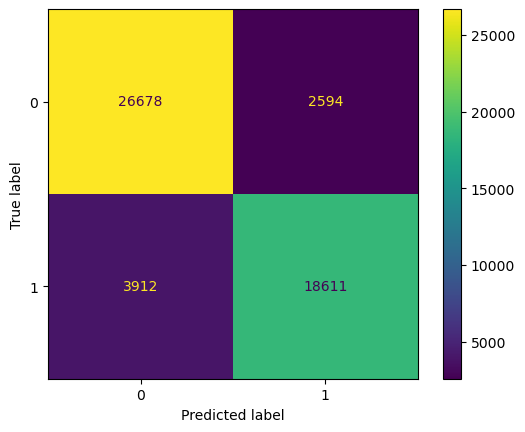

In [16]:
### Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC Score: {auc}")
print(f"Classification Report:\n{classification_rep}")

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

(0.5402628030891514, 0.4555237304561506, 0.42433012976268847, 0.26659460543780167, 0.2506999605032998, 0.2492974144760749, 0.20100881925062586, 0.18886946416928518, 0.14300464891504006, 0.0773843249479691, 0.07365992406867061, 0.06744117241148573, 0.0560569831918607, 0.022999286481249825, -0.009806044489091392, -0.012869616730694977, -0.019660758615708485, -0.02028195228809082, -0.0767652756649444, -0.0976444725839043, -0.10369229016717219, -0.1345372512511327, -0.17043164120670262, -0.1790004365482991, -0.26659460543337765, -0.42433012976247764)


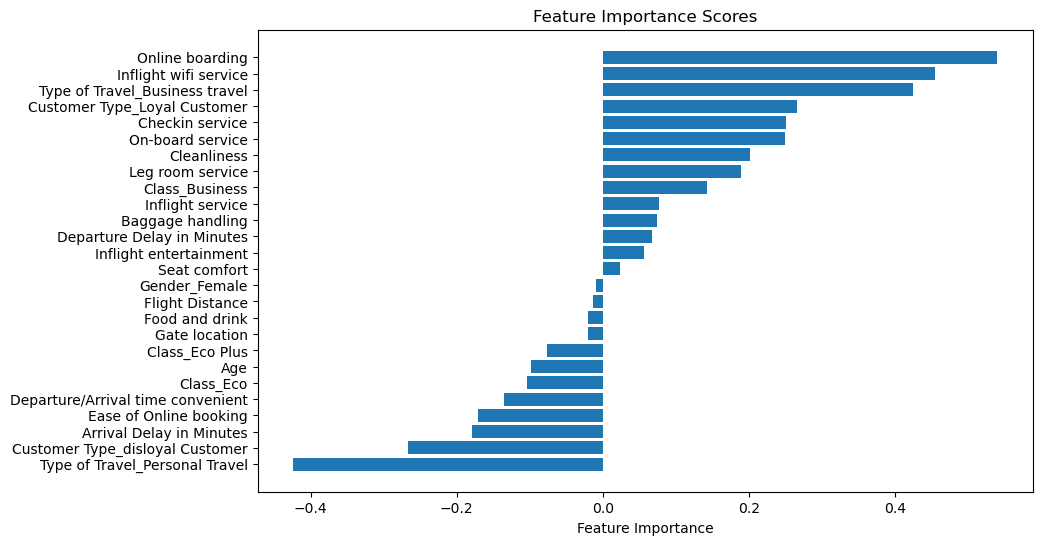

In [18]:
### Feature importance

# create features array
features = []
for feature in x_encoded:
    if feature == 'satisfaction': continue
    features.append(feature)

# remove satisfaction column
features = features[0:-1]

# get feature coefficients
feature_importance = clf.coef_[0]

# # Match features to importance scores
feature_importance_dict = dict(zip(features, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance scores from sorted_features
features, importance = zip(*sorted_features)

print(importance)


# Feature importance bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()